In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
""" Load the data from the csv file and perform the analysis."""
df = pd.read_csv('error_angles_Flo.csv')
df

,subject_name,target_mode,perturbation_type,trial_number,trial_name,target_pos,changed_angels,error_angles
0,Flo,sequence,sudden,1,Baseline,-1.221730,20,0.179848
1,Flo,sequence,sudden,2,Baseline,-1.221730,20,-0.048957
2,Flo,sequence,sudden,3,Sudden Perturbation,-1.221730,20,0.350331
3,Flo,sequence,sudden,4,Sudden Perturbation,-1.221730,20,0.260375
4,Flo,sequence,sudden,5,Sudden Perturbation,-1.221730,20,0.278552
5,Flo,sequence,sudden,6,Sudden Perturbation,-1.221730,20,0.532072
6,Flo,sequence,sudden,7,Baseline,-1.221730,20,-0.213261
7,Flo,sequence,sudden,8,Baseline,-1.221730,20,0.238149
8,Flo,sequence,sudden,9,Baseline,-0.872665,40,-0.219120
9,Flo,sequence,sudden,10,Baseline,-0.872665,40,-0.023391


In [3]:
""" Calulate the motor varibility or the std for each baseline and each trial."""
MV = df[df['trial_name'] == 'Baseline']['error_angles'].std()
print(MV)

""" Create an array of the error angles for each trial."""
error_angels_arr = np.array(np.abs(df[df['trial_name'] != 'Baseline']['error_angles']))

""" Calculate the adaptation rate for each trial."""
""" Choose for each trial the maximum between the error angle and the motor variability."""
adaptation_rate = np.where(MV / error_angels_arr > 1, 1, MV / error_angels_arr) * 100

trials_number_adapt = df[df['trial_name'] != 'Baseline'].trial_number
hue_trials = df[df['trial_name'] != 'Baseline'].changed_angels

0.23184907557505954


array([ 66.18003827,  89.04433912,  83.23375582,  43.57478138,
       100.        ,  56.65913022, 100.        , 100.        ,
        53.87746621, 100.        ,  74.98379403, 100.        ,
       100.        , 100.        , 100.        , 100.        ])

In [ ]:
""" Plot the adaptation rate but not for the baseline."""
g0 = sns.scatterplot(x= trials_number_adapt, y= adaptation_rate, hue = hue_trials, palette = 'Set2')
g0 = sns.lineplot(x= trials_number_adapt, y= adaptation_rate, hue = hue_trials, palette = 'Set2')
""" Make only one legend for the two plots."""
handles, labels = g0.get_legend_handles_labels()
g0.legend(handles=handles[:4], labels=labels[:4])

g0.set(xlabel='Trial number', ylabel='Adaptation rate (%)', title = 'Adaptation rate for each trial')


g0.figure.savefig("error_angles_adaptation"+ str(df.subject_name.unique()[0]) + ".svg")

In [12]:
""" Create a dataframe with the adaptation rate and the trial_number."""
trials_number_baseline = df[df['trial_name'] == 'Baseline'].trial_number
baseline_error = df[df['trial_name'] == 'Baseline'].error_angles * 100

MV_error = 100 * MV / np.abs(baseline_error)
hue_baseline = df[df['trial_name'] == 'Baseline'].changed_angels


C:\Users\flori\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\flori\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\flori\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\flori\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

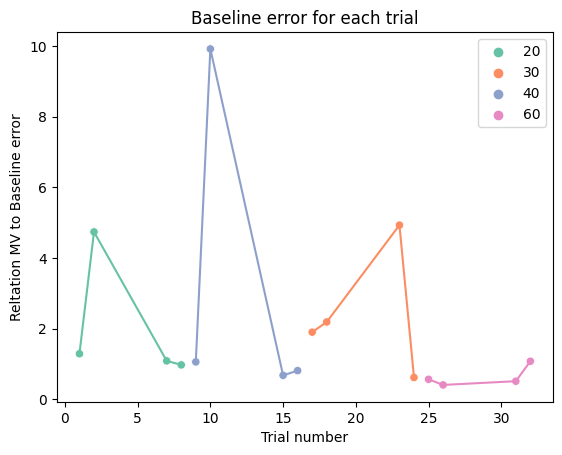

In [32]:
""" Plot the baseline error."""

g1 = sns.scatterplot(x= trials_number_baseline, y= MV_error, hue = hue_baseline,  palette = 'Set2')

g1 = sns.lineplot(x= trials_number_baseline, y= MV_error, hue = hue_baseline,  palette = 'Set2')
""" Make only one legend for the two plots."""
handles, labels = g1.get_legend_handles_labels()
g1.legend(handles=handles[:4], labels=labels[:4])

g1.set(xlabel='Trial number', ylabel='Reltation MV to Baseline error', title = 'Baseline error for each trial')

g1.figure.savefig("baseline_error_"+ str(df.subject_name.unique()[0]) + ".svg")

In [ ]:
""" Quantify the aftereffect."""


trials_numer_aftereffect = df[df['trial_name'] == 'Aftereffect'].trial_number

""" Create an array of the error angles for each trial."""
error_angels_arr = np.array(np.abs(df[df['trial_name'] == 'Aftereffect']['error_angles']))
hue_trials = df[df['trial_name'] == 'Aftereffect'].changed_angels

""" Calculate the adaptation rate for each trial."""
""" Choose for each trial the maximum between the error angle and the motor variability."""
adaptation_rate = np.where(MV / error_angels_arr > 1, 1, MV / error_angels_arr) * 100

In [ ]:
""" Plot the adaptation rate but not for the baseline."""
g0 = sns.scatterplot(x= trials_numer_aftereffect, y= adaptation_rate, hue = hue_trials, palette = 'Set2')
g0 = sns.lineplot(x= trials_numer_aftereffect, y= adaptation_rate, hue = hue_trials, palette = 'Set2')
""" Make only one legend for the two plots."""
handles, labels = g0.get_legend_handles_labels()
g0.legend(handles=handles[:4], labels=labels[:4])

g0.set(xlabel='Trial number', ylabel='Adaptation rate (%)', title = 'Adaptation rate for each trial')


g0.figure.savefig("error_angles_aftereffect"+ str(df.subject_name.unique()[0]) + ".svg")